## K Means Clustering Project

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [2]:
clg = pd.read_csv('College_Data',index_col=0)
clg.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

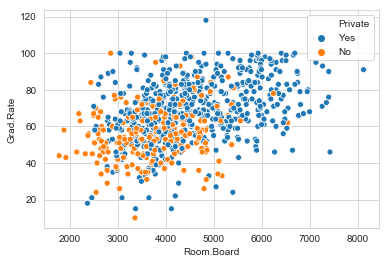

In [3]:
sns.set_style('whitegrid')

sns.scatterplot('Room.Board','Grad.Rate',data=clg,hue='Private')

**Scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

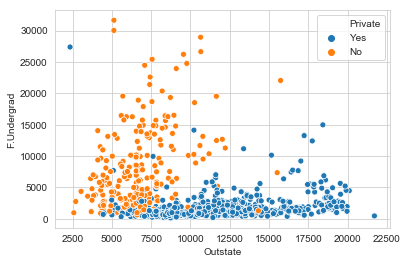

In [4]:
sns.scatterplot('Outstate','F.Undergrad',data=clg,hue='Private')

** Stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

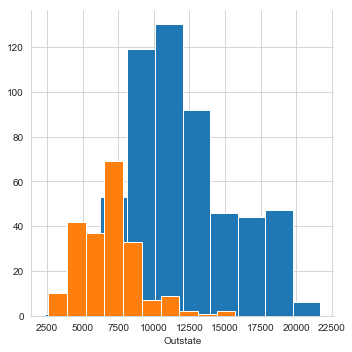

In [5]:
k = sns.FacetGrid(clg, hue='Private',height=5)
k = k.map(plt.hist, "Outstate")

**Create a similar histogram for the Grad.Rate column.**

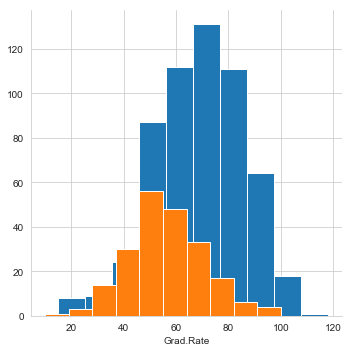

In [6]:
g = sns.FacetGrid(clg, hue='Private',height=5)
g = g.map(plt.hist, "Grad.Rate")

In [7]:
clg[clg['Grad.Rate']>100]
clg['Grad.Rate']['Cazenovia College'] = 100

C:\Users\ravic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
x=clg.drop('Private', axis=1)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [9]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [10]:
clg['Cluster'] = clg['Private'].apply(converter)

** Confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(clg['Cluster'],km.labels_))
print(classification_report(clg['Cluster'],km.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

   micro avg       0.78      0.78      0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

